<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/4-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 럭키백의 확률

랜덤박스에서 확률 구하기

### 데이터 준비하기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


csv 파일을 데이터프레임으로 변환한 다음 head()로 처음 5개를 출력해서 제대로 변환되었는 지 확인

In [7]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


어떤 종류의 생선이 있는 지 species 열에서 고유한 값을 추출하여 확인

In [8]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

물고기의 5가지 특성을 입력데이터로 변환

In [9]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


제대로 입력 되었는 지 확인

In [10]:
fish_target = fish['Species'].to_numpy()

타깃데이터로 species 설정

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

훈련 데이터와 테스트 데이터로 나눠줌

In [12]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

fit()으로 훈련 데이터의 통계적 정보를 학습하고, 훈련 데이터와 테스트 데이터 모두를 전처리한다

### k-최근접 이웃 분류기의 확률 예측

In [13]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타깃 데이터에 2개 이상의 클래스 포함된 문제 -> 다중 분류  
다중 분류도 이진 분류와 모델을 만들고 훈련하는 방식은 같음

In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


타깃을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 바뀜

In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


모델이 처음 5개 테스트 데이터를 뭐라고 예측했는 지 확인해봄

In [16]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


처음 5개의 각각의 확률을 계산해서보여줌 decimals는 소수점 자리 조정


In [17]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


이 샘플(위의 4번째 데이터)의 이웃은 5번째 클래스 roach 1개 3번째 클래스 perch가 2개 -> 각각 확률 0.3333, 0.6667

그런데 3개 최근접 이웃 쓰면 확률이 0 1/3 2/3 1 밖에 안되는데 이건 좀..

## 로지스틱 회귀

로지스틱 회귀는 이름은 회귀이지만 분류 모델임  
z = a*(weight) + b*(length) + c*(diagonal) + d*(height) + e*(width) + f  
a b c d e는 가중치 혹은 계수  
z는 어떤 값이든 가능하지만 확률은 0~1사이의 값이어야 하므로 시그모이드 함수(로지스틱 함수) 사용  


1/{1+e^(-z)}

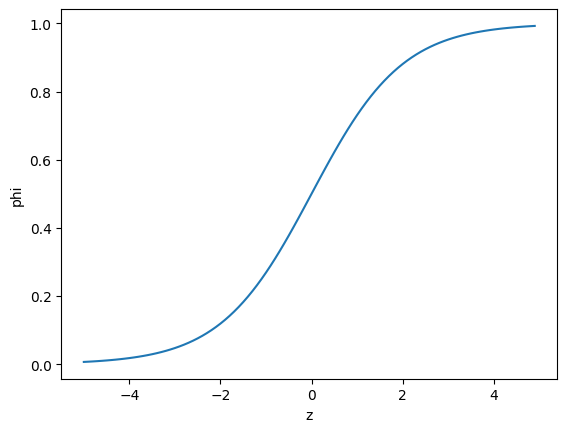

In [18]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

이진 분류에선 0.5를 임계값으로 분류함  
정확히 0.5일 때는 라이브러리마다 다름

In [19]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


불리언 인덱싱; 넘파이 배열에서 true false 값을 전달하여 행을 선택

In [20]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

bream_smelt_indexes는 도미나 방어일 경우 true, 둘다 아닐 경우 false 값 들어가 있음  
이를 이용해 train_scaled와 train_target에 불리언 인덱싱을 적용하면 도미와 방어 데이터만 골라낼 수 있음

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [22]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [23]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [24]:
print(lr.classes_)

['Bream' 'Smelt']


알파벳 순이므로 도미(bream)이 음성 방어(smelt)가 양성

In [25]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


로지스틱 회귀가 학습한 방정식 확인  
선형 회귀와 매우 비슷함

In [27]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


z 값 확인해보기

In [28]:
from scipy.special import expit

print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


각 z값에 대응되는 확률 계산

### 로지스틱 회귀로 다중 분류 수행하기

In [29]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


꽤나 괜찮은 거 같죠?

In [30]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [31]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [32]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중 분류는 클래스마다 z값을 하나씩 계산함  
가장 높은 z값을 출력하는 클래스가 예측 클래스  
확률 계산은 소프트맥스 함수 사용

소프트 맥스 함수  
e_sum = e^z1 + e^z2 + ...  
s1 = e^z1/e_sum, s2 = e^z2/e_sum, ...

In [34]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


z1 ~ z7의 값

In [35]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


선형 회귀와 로지스틱 회귀가 다른 점은 선형 회귀는 계산한 값을 그대로 출력하고 로지스틱 회귀는 0~1 사이로 압축함

최근접 이웃 모델로 확률을 계산하면 이웃한 샘플 클래스 비율이므로 항상 정해진 확률만 출력함  
이를 개선하기 위해 분류 알고리즘인 로지스틱 회귀 사용  
